## Problem Statement : 


Given a question, the aim is to identify the category it belongs to -> 
There are 4 categories available i.e. "Who, What, When, Affirmation(yes/no)."
Label any sentence that does not fall in any of the above four as "Unknown" type.


In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_name = "LabelledData (1).txt"
with open(file_name,'r') as file:
    lines = [(line.lower()).rstrip('\n') for line in file if (line!= '\n')]

print(lines[0])

how did serfdom develop in and then leave russia ? ,,, unknown


In [3]:
holder = {}
for line in lines:
    key, value = line.split(",,,")
    holder[key.rstrip()] = value.lstrip()

print(holder["how did serfdom develop in and then leave russia ?"])    

unknown


In [4]:
data = pd.DataFrame(holder.items(),columns = ['Question', 'Label'])
print(data.shape)

(1476, 2)


In [5]:
data.head(10)

,Question,Label
0,how did serfdom develop in and then leave russ...,unknown
1,what films featured the character popeye doyle ?,what
2,how can i find a list of celebrities ' real na...,unknown
3,what fowl grabs the spotlight after the chines...,what
4,what is the full form of .com ?,what
5,what contemptible scoundrel stole the cork fro...,what
6,what team did baseball 's st. louis browns bec...,what
7,what is the oldest profession ?,what
8,what are liver enzymes ?,what
9,name the scar-faced bounty hunter of the old w...,unknown


In [6]:
data["Label"].unique()

array(['unknown', 'what', 'when', 'who', 'affirmation'], dtype=object)

In [7]:
data.isnull().sum()

Question    0
Label       0
dtype: int64

In [8]:
#removing unwanted expressions line(, '  "  ; - .   etc)
import re
data['Question'] = data['Question'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
data.head(10)

,Question,Label
0,how did serfdom develop in and then leave russia,unknown
1,what films featured the character popeye doyle,what
2,how can i find a list of celebrities real names,unknown
3,what fowl grabs the spotlight after the chines...,what
4,what is the full form of com,what
5,what contemptible scoundrel stole the cork fro...,what
6,what team did baseball s st louis browns become,what
7,what is the oldest profession,what
8,what are liver enzymes,what
9,name the scarfaced bounty hunter of the old west,unknown


## Naive Bayes

In [9]:
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix as cf_mat
from sklearn.metrics import classification_report as repo

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB as nb
from nltk.stem import SnowballStemmer
from nltk import word_tokenize
from nltk.corpus import wordnet

In [10]:
x = data["Question"]
y = data["Label"]

In [11]:
#stemming
stemmer = SnowballStemmer('english').stem
def stem_tokenize(text):
    return [stemmer(i) for i in word_tokenize(text)]

In [12]:
#Instantiate
vectorizer = CountVectorizer(analyzer ='word',lowercase = True, tokenizer = stem_tokenize)
x  = vectorizer.fit_transform(x.values)

In [13]:
print(x)

  (0, 1476)	1
  (0, 915)	1
  (0, 2570)	1
  (0, 901)	1
  (0, 1513)	1
  (0, 227)	1
  (0, 2881)	1
  (0, 1710)	1
  (0, 2508)	1
  (1, 3116)	1
  (1, 1171)	1
  (1, 1151)	1
  (1, 2877)	1
  (1, 613)	1
  (1, 2275)	1
  (1, 977)	1
  (2, 1476)	1
  (2, 545)	1
  (2, 1500)	1
  (2, 1175)	1
  (2, 128)	1
  (2, 1744)	1
  (2, 2100)	1
  (2, 589)	1
  (2, 2397)	1
  :	:
  (1472, 1580)	1
  (1472, 356)	1
  (1472, 2422)	1
  (1473, 946)	1
  (1473, 2117)	1
  (1473, 1405)	1
  (1473, 2894)	1
  (1473, 1466)	1
  (1474, 1513)	1
  (1474, 545)	1
  (1474, 1500)	1
  (1474, 1580)	1
  (1474, 1296)	1
  (1474, 1521)	1
  (1475, 128)	2
  (1475, 3156)	1
  (1475, 2115)	1
  (1475, 3181)	1
  (1475, 3176)	1
  (1475, 2894)	1
  (1475, 1993)	1
  (1475, 1217)	1
  (1475, 88)	1
  (1475, 1023)	1
  (1475, 2487)	1


We got a sparse matrix for each sentence 

In [14]:
# split will not work for our matrix form, doing it via np.random
# This is a 20% testing and 80% training
order = np.arange(x.shape[0])
np.random.shuffle(order)
x = x[order]
y = y[order]

test_length = int(0.2*x.shape[0])

x_train = x[:-test_length]
x_test = x[-test_length:]

y_train = y[:-test_length]
y_test = y[-test_length:]


In [15]:
order

array([ 690,  360,  840, ...,  721, 1151,  493])

In [16]:
Naive = nb()
Naive.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
preds = Naive.predict(x_test)
print("Accuracy " ,Naive.score(x_test,y_test))

Accuracy  0.9186440677966101


In [18]:
print("classification report\n",repo(preds,y_test))

classification report
               precision    recall  f1-score   support

 affirmation       0.81      1.00      0.89        17
     unknown       0.90      0.92      0.91        48
        what       0.96      0.91      0.94       135
        when       0.41      0.78      0.54         9
         who       1.00      0.93      0.96        86

    accuracy                           0.92       295
   macro avg       0.82      0.91      0.85       295
weighted avg       0.94      0.92      0.92       295



In [19]:
test1 = vectorizer.transform(["What is your name?"])
test2 = vectorizer.transform(["When is the show happening?"])
test3 = vectorizer.transform(["Is there a cab available for the airport?"])
test4 = vectorizer.transform(["What time does the train leave?"])
test5 = vectorizer.transform(["how many boys are there in the game of football?"])



In [20]:
print(Naive.predict(test1))

print(Naive.predict(test2))

print(Naive.predict(test3))

print(Naive.predict(test4))

print(Naive.predict(test5))

['what']
['what']
['what']
['what']
['unknown']


Clearly the model is predicting poorly, lets try to see other models

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier as random_forest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [22]:
#hyperparameter search
from scipy.stats import randint

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

param_rf = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': randint(1,10),
               'min_samples_leaf': randint(1,5),
               'bootstrap': [True, False],
               'criterion':['gini','entropy']}

rf = random_forest()
rf_cv = RandomizedSearchCV(estimator = rf, param_distributions = param_rf, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_cv = rf_cv.fit(x_train,y_train)

print(rf_cv.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=522,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [23]:
rf = random_forest(**rf_cv.best_params_)

rf = rf.fit(x_train,y_train)

In [24]:
preds = rf.predict(x_test)
print("Accuracy " ,rf.score(x_test,y_test))

Accuracy  0.9728813559322034


In [25]:
print("classification report\n",repo(preds,y_test))

classification report
               precision    recall  f1-score   support

 affirmation       0.95      1.00      0.98        20
     unknown       0.96      0.98      0.97        48
        what       0.98      0.98      0.98       128
        when       0.94      0.84      0.89        19
         who       0.99      0.99      0.99        80

    accuracy                           0.97       295
   macro avg       0.96      0.96      0.96       295
weighted avg       0.97      0.97      0.97       295



In [26]:
test1 = vectorizer.transform(["What is your name?"])
test2 = vectorizer.transform(["When is the show happening?"])
test3 = vectorizer.transform(["Is there a cab available for the airport?"])
test4 = vectorizer.transform(["What time does the train leave?"])
test5 = vectorizer.transform(["how many boys are there in the game of football?"])

In [27]:
print(rf.predict(test1))

print(rf.predict(test2))

print(rf.predict(test3))

print(rf.predict(test4))

print(rf.predict(test5))

['what']
['when']
['affirmation']
['when']
['unknown']


### Let's Save the prospective models

In [48]:
import pickle as p

p.dump(data.Question,open('./saved-data/random-forest/x.pickle','wb'))
# Random Forest
# We have to dump both vectorizer and Random Forest classifier object
p.dump(vectorizer,open('./saved-data/random-forest/vectorizer.pickle','wb'))
p.dump(rf,open('./saved-data/random-forest/random_forest.pickle','wb'))

This is potentially good model, lets try other model 

## LSTM

In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Embedding

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input


physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
#Tokenizer
tokenizer = Tokenizer(num_words = 30000, split = " ")
tokenizer.fit_on_texts(data.Question.values)
x = tokenizer.texts_to_sequences(data.Question.values)
x = pad_sequences(x,maxlen = 35)

In [32]:
print(x[0])
print(data["Question"].iloc[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   11   15
 1122 1123    6   14 1124  287  377]
how did serfdom develop in and then leave russia 


In [33]:
print(tokenizer.word_index["serfdom"])

1122


In [34]:
word_index = tokenizer.word_index

In [35]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(data["Label"])
y = encoder.transform(data["Label"])
y = to_categorical(np.asarray(y))

In [36]:
order = np.arange(x.shape[0])
np.random.shuffle(order)
x = x[order]
y = y[order]
test_size = int(0.2 * x.shape[0])

x_train = x[:-test_length]
x_test = x[-test_length:]

y_train = y[:-test_length]
y_test = y[-test_length:]


In [37]:
#Pretrained GLove Model
# Load Glove word2vec embeddings
# value1 coeff1(300 long vector)
# value2 coeff2(300 long vector)
from tqdm import tqdm
embedding_index = {}

glove_file = 'glove.6B.300d.txt'
with open(glove_file,'r', encoding = "utf-8") as file:
    for line in tqdm(file):
        values = line.split()
        word  = values[0]
        coeff = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeff

        
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word,i in word_index.items():
    if embedding_index.get(word) is not None:
        embedding_matrix[i] = embedding_index.get(word)
                

400000it [00:37, 10615.91it/s]


In [38]:

def get_model(num_classes = 5):
    
    embedding_layer = Embedding(len(word_index)+1,300,
                            weights=[embedding_matrix],
                            input_length = 35,
                            trainable = False)
    LSTM_layer = LSTM(512, dropout=0.2, recurrent_dropout=0.2)    
    Dense_layer_relu = Dense(128,activation = 'relu')
    Dense_layer_relu1 = Dense(64,activation = 'relu')
    Dense_layer_softmax = Dense(num_classes,activation = 'softmax')
    
    inputs =  Input(shape=(35,),dtype = 'int32')
    encoded_emb = embedding_layer(inputs)
    encoded_stream = LSTM_layer(encoded_emb)
    outputs = (Dense_layer_relu(encoded_stream))
    outputs = (Dense_layer_relu1(outputs))
    outputs = Dense_layer_softmax(outputs)
    
    model = Model(inputs,outputs)
    
    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
    print(model.summary())
    return model

In [39]:
lstm_model = get_model() 

history = lstm_model.fit(x_train, y_train,
                          batch_size=512,
                          epochs=24,
                          validation_data=(x_test, y_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 35, 300)           1105800   
_________________________________________________________________
lstm (LSTM)                  (None, 512)               1665024   
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 2,845,069
Trainable params: 1,739,269
Non-trainable params: 1,105,800
___________________________________________

In [40]:
test1 = tokenizer.texts_to_sequences(["What is your name?"])
test1 = pad_sequences(test1, maxlen=35)

test2 = tokenizer.texts_to_sequences(["When is the show happening?"])
test2 = pad_sequences(test2, maxlen=35)

test3 = tokenizer.texts_to_sequences(["Is there a cab available for the airport?"])
test3 = pad_sequences(test3, maxlen=35)

test4 = tokenizer.texts_to_sequences(["What time does the train leave?"])
test4 = pad_sequences(test4, maxlen=35)

test5 = tokenizer.texts_to_sequences(["how many boys are there in the game of football?"])
test5 = pad_sequences(test5, maxlen=35)

In [41]:
print(encoder.inverse_transform([np.argmax(lstm_model.predict(test1))]))
print(encoder.inverse_transform([np.argmax(lstm_model.predict(test2))]))
print(encoder.inverse_transform([np.argmax(lstm_model.predict(test3))]))
print(encoder.inverse_transform([np.argmax(lstm_model.predict(test4))]))
print(encoder.inverse_transform([np.argmax(lstm_model.predict(test5))]))

['what']
['when']
['affirmation']
['when']
['unknown']


In [42]:
lstm_model.evaluate(x_test,y_test)

295/295 [==============================] - 0s 663us/sample - loss: 0.0763 - accuracy: 0.9864


[0.07633882811513998, 0.98644066]

This is also a pretty good model

I've tried some more models of LSTM like bidirectional but it as it turns out, it overfitted and gave bad result 

I've also tried adjusting the hyperparameters, the best what was achieved was coming in between (0.96 to 0.98)

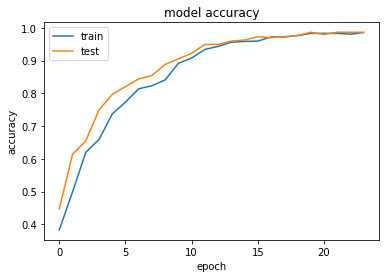

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

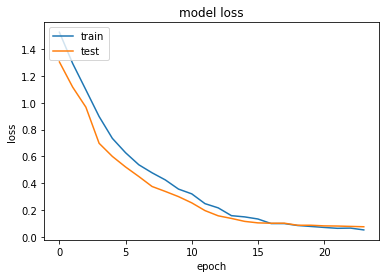

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Let's Save the prospective models

In [45]:
import pickle as p

In [46]:
# LSTM Model
# We have to dump both encoder object and our lstm_model
p.dump(encoder,open('./saved-data/LSTM/encoder.pickle','wb'))

tf.keras.models.save_model(
    model = lstm_model,
    filepath = './saved-data/LSTM/lstm_model.h5',
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None)

p.dump(tokenizer,open('./saved-data/LSTM/tokenizer.pickle','wb'))